# i. Introduction

================================================================================================================================================

Nama = Kenneth Vincentius

The aim of this project is to find out which countries to visit based on the characteristics of each country

================================================================================================================================================


Problem Statement : 

A friend came to me to ask for recommendations on which countries have low costs of living (residence, food, internet, etc.) because he felt that in the country he was living in, all the prices of necessities had risen so he planned to settle in another country and start his life as an immigrant.

# ii. Import Libraries

In [1]:
#modul persiapan dan penampilan dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# modul dari data preprocessing
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from sklearn.decomposition import PCA

#modul untuk model
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# iii. Data Loading

In [2]:
#data loading and displaying the top 10 data
df = pd.read_csv('living-index-and-internet-prices.csv')
df.head(10)

,Unnamed: 0,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,0,Afghanistan,AF,ASIA (EX. NEAR EAST),20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,"4,068,194","37,171,921"
1,1,Albania,AL,EASTERN EUROPE,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,"2,105,339","2,882,740"
2,2,Algeria,DZ,NORTHERN AFRICA,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,"26,350,000","42,228,408"
3,3,Argentina,AR,SOUTH AMERICA,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,"33,561,876","44,361,150"
4,4,Armenia,AM,CIS (FORMER USSR),33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,"2,043,110","2,951,745"
5,5,Australia,AU,OCEANIA,77.75,36.84,77.44,72.95,104.63,46.0,0.70,0.10,7.62,"21,159,515","24,898,152"
6,6,Austria,AT,WESTERN EUROPE,71.04,27.13,65.88,66.03,77.25,60.0,1.17,0.24,23.43,"7,681,957","8,891,388"
7,7,Azerbaijan,AZ,CIS (FORMER USSR),29.73,7.86,26.57,26.73,27.26,42.0,1.82,0.24,9.80,"7,763,795","9,949,537"
8,8,Bahamas,BS,CARIBBEAN,84.00,35.34,70.59,89.09,45.07,17.0,5.98,3.99,10.74,"336,057","385,637"
9,9,Bahrain,BH,NEAR EAST,54.77,29.22,44.59,48.94,61.41,24.0,2.12,1.27,8.49,"1,431,090","1,569,446"


# Data Cleaning

In [3]:
#see data types and column lists
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          137 non-null    int64  
 1   Country                             137 non-null    object 
 2   Country code                        137 non-null    object 
 3   Continental Region                  137 non-null    object 
 4   Cost of Living Index                137 non-null    float64
 5   Rent Index                          137 non-null    float64
 6   Groceries Index                     137 non-null    float64
 7   Restaurant Price Index              137 non-null    float64
 8   Local Purchasing Power Index        137 non-null    float64
 9   Number of Internet Plans            137 non-null    float64
 10  Average Price per 1GB (USD)         137 non-null    float64
 11  Cheapest Price per 1GB (USD)        137 non-n

In [4]:
#check is there any missing value
df.isnull().sum()

Unnamed: 0                            0
Country                               0
Country code                          0
Continental Region                    0
Cost of Living Index                  0
Rent Index                            0
Groceries Index                       0
Restaurant Price Index                0
Local Purchasing Power Index          0
Number of Internet Plans              0
Average Price per 1GB (USD)           0
Cheapest Price per 1GB (USD)          0
Most Expensive Price per 1GB (USD)    0
Internet Users                        3
Population                            5
dtype: int64

In [5]:
#eliminate ',' because the data will be converted into float form because PCA must be in numeric form
df['Population'] = df['Population'].str.replace(',', '')
df['Internet Users'] = df['Internet Users'].str.replace(',', '')
df

,Unnamed: 0,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,0,Afghanistan,AF,ASIA (EX. NEAR EAST),20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,4068194,37171921
1,1,Albania,AL,EASTERN EUROPE,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,2105339,2882740
2,2,Algeria,DZ,NORTHERN AFRICA,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,26350000,42228408
3,3,Argentina,AR,SOUTH AMERICA,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,33561876,44361150
4,4,Armenia,AM,CIS (FORMER USSR),33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,2043110,2951745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Uruguay,UY,SOUTH AMERICA,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,2360269,3449285
133,133,Uzbekistan,UZ,CIS (FORMER USSR),27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,16692456,32476244
134,134,Vietnam,VN,ASIA (EX. NEAR EAST),37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,68172134,95545962
135,135,Yemen,YE,NEAR EAST,53.14,6.71,67.12,24.74,14.41,17.0,15.98,0.40,39.94,7548512,28498683


In [6]:
#change population and internet users column data type to float
df['Population'] = df['Population'].astype(float)
df['Internet Users'] = df['Internet Users'].astype(float)
df

,Unnamed: 0,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,0,Afghanistan,AF,ASIA (EX. NEAR EAST),20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,4068194.0,37171921.0
1,1,Albania,AL,EASTERN EUROPE,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,2105339.0,2882740.0
2,2,Algeria,DZ,NORTHERN AFRICA,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,26350000.0,42228408.0
3,3,Argentina,AR,SOUTH AMERICA,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,33561876.0,44361150.0
4,4,Armenia,AM,CIS (FORMER USSR),33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,2043110.0,2951745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Uruguay,UY,SOUTH AMERICA,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,2360269.0,3449285.0
133,133,Uzbekistan,UZ,CIS (FORMER USSR),27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,16692456.0,32476244.0
134,134,Vietnam,VN,ASIA (EX. NEAR EAST),37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,68172134.0,95545962.0
135,135,Yemen,YE,NEAR EAST,53.14,6.71,67.12,24.74,14.41,17.0,15.98,0.40,39.94,7548512.0,28498683.0


In [7]:
#check how many precentage of the data that as missing values
a=df['Internet Users'].isnull().sum()*100/len(df)
b=df['Population'].isnull().sum()*100/len(df)
print(a)
print(b)

2.18978102189781
3.6496350364963503


In [8]:
#because the missing values ​​are less than 5%, I will handle missing values ​​by dropping the data with missing values
df1= df.dropna()
df1

,Unnamed: 0,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,0,Afghanistan,AF,ASIA (EX. NEAR EAST),20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,4068194.0,37171921.0
1,1,Albania,AL,EASTERN EUROPE,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,2105339.0,2882740.0
2,2,Algeria,DZ,NORTHERN AFRICA,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,26350000.0,42228408.0
3,3,Argentina,AR,SOUTH AMERICA,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,33561876.0,44361150.0
4,4,Armenia,AM,CIS (FORMER USSR),33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,2043110.0,2951745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Uruguay,UY,SOUTH AMERICA,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,2360269.0,3449285.0
133,133,Uzbekistan,UZ,CIS (FORMER USSR),27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,16692456.0,32476244.0
134,134,Vietnam,VN,ASIA (EX. NEAR EAST),37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,68172134.0,95545962.0
135,135,Yemen,YE,NEAR EAST,53.14,6.71,67.12,24.74,14.41,17.0,15.98,0.40,39.94,7548512.0,28498683.0


In [9]:
#display data that has been handled for the missing values
df1.isnull().sum()

Unnamed: 0                            0
Country                               0
Country code                          0
Continental Region                    0
Cost of Living Index                  0
Rent Index                            0
Groceries Index                       0
Restaurant Price Index                0
Local Purchasing Power Index          0
Number of Internet Plans              0
Average Price per 1GB (USD)           0
Cheapest Price per 1GB (USD)          0
Most Expensive Price per 1GB (USD)    0
Internet Users                        0
Population                            0
dtype: int64

In [10]:
#I dropped all categorical columns to be processed in data processing, only numerical data with making new variable
df2 = df1.drop(['Unnamed: 0', 'Country', 'Country code', 'Continental Region'],axis=1)
df2

,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,4068194.0,37171921.0
1,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,2105339.0,2882740.0
2,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,26350000.0,42228408.0
3,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,33561876.0,44361150.0
4,33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,2043110.0,2951745.0
...,...,...,...,...,...,...,...,...,...,...,...
132,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,2360269.0,3449285.0
133,27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,16692456.0,32476244.0
134,37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,68172134.0,95545962.0
135,53.14,6.71,67.12,24.74,14.41,17.0,15.98,0.40,39.94,7548512.0,28498683.0


In [11]:
#reset the index of the new dataframe that has been dropped
df2.reset_index()

,index,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,0,20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,4068194.0,37171921.0
1,1,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,2105339.0,2882740.0
2,2,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,26350000.0,42228408.0
3,3,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,33561876.0,44361150.0
4,4,33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,2043110.0,2951745.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,132,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,2360269.0,3449285.0
128,133,27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,16692456.0,32476244.0
129,134,37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,68172134.0,95545962.0
130,135,53.14,6.71,67.12,24.74,14.41,17.0,15.98,0.40,39.94,7548512.0,28498683.0


In [12]:
#check column
df2.columns

Index(['Cost of Living Index', 'Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Number of Internet Plans', 'Average Price per 1GB (USD)',
       'Cheapest Price per 1GB (USD)', 'Most Expensive Price per 1GB (USD)',
       'Internet Users', 'Population'],
      dtype='object')

# iv. Feature Engineering

In [13]:
#check skewness in each column to determine whether the distribution is normal or not
#so we can determine which column to use z-score and Tukey rule with threshold
#threshold skewness, normal distribution skewness smaller than 0.5 and greater than -0.5
#threshold skewness, non-normal distribution skewness greater than 0.5 or less than -0.5
col_num =['Cost of Living Index', 'Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Number of Internet Plans', 'Average Price per 1GB (USD)',
       'Cheapest Price per 1GB (USD)', 'Most Expensive Price per 1GB (USD)',
       'Internet Users', 'Population']

data_numerik_normal = []
data_numerik_non_normal = []
for i in col_num :
    skew = df2[i].skew()
    if (skew >=0.5) | (skew <=-0.5):
        data_numerik_non_normal.append(i)

    elif (skew<0.5) & (skew >=-0.5):
        data_numerik_normal.append(i)

    print('Skewness from', i ,'is', skew )

Skewness from Cost of Living Index is 1.5224247080768727
Skewness from Rent Index is 2.413934493184835
Skewness from Groceries Index is 1.7675797148212868
Skewness from Restaurant Price Index is 1.6463025126522328
Skewness from Local Purchasing Power Index is 0.7341113840976072
Skewness from Number of Internet Plans is 0.38925907304747315
Skewness from Average Price per 1GB (USD) is 3.185901176722684
Skewness from Cheapest Price per 1GB (USD) is 2.7515713332202867
Skewness from Most Expensive Price per 1GB (USD) is 9.054020499555174
Skewness from Internet Users is 6.734065279094119
Skewness from Population is 6.991656736010828


In [14]:
#displays which data is normal and abnormal for handling outliers
print(f'normal numerical data :{data_numerik_normal}')
print(f'abnormal numerical data :{data_numerik_non_normal}')

normal numerical data :['Number of Internet Plans']
abnormal numerical data :['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index', 'Average Price per 1GB (USD)', 'Cheapest Price per 1GB (USD)', 'Most Expensive Price per 1GB (USD)', 'Internet Users', 'Population']


In [15]:
#for normal data using z-score / gaussian by default from the trimmer method
Capping_normal = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables= data_numerik_normal)

Capping_normal = Capping_normal.fit_transform(df2[data_numerik_normal])

In [16]:
#fr abnormal data, use the Tukey rule / IQR from the trimmer method
Capping_non_normal = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables= data_numerik_non_normal)

Capping_non_normal = Capping_non_normal.fit_transform(df2[data_numerik_non_normal])

In [17]:
#recombine normal and abnormal numeric columns that have been handled by outliers 
concat_num_capping = pd.concat([Capping_normal,Capping_non_normal],axis = 1)
concat_num_capping

,Number of Internet Plans,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,35.0,20.37,2.72,14.92,12.41,23.04,1.020,0.38,2.1200,4068194.0,37171921.0
1,32.0,35.50,8.47,29.32,25.82,30.19,2.800,0.72,93.4625,2105339.0,2882740.0
2,20.0,26.87,4.59,28.82,14.48,24.63,0.510,0.16,2.2400,26350000.0,42228408.0
3,28.0,34.69,7.71,28.17,33.32,30.72,2.380,0.44,11.4700,33561876.0,44361150.0
4,21.0,33.89,11.61,27.59,30.55,28.86,0.760,0.22,13.0200,2043110.0,2951745.0
...,...,...,...,...,...,...,...,...,...,...,...
132,35.0,52.07,13.93,44.01,49.39,30.07,1.510,0.10,6.3300,2360269.0,3449285.0
133,60.0,27.31,9.29,26.83,24.22,22.37,0.600,0.01,23.7500,16692456.0,32476244.0
134,46.0,37.48,13.22,38.70,19.98,29.38,0.490,0.07,5.5500,68172134.0,95545962.0
135,17.0,53.14,6.71,67.12,24.74,14.41,9.435,0.40,39.9400,7548512.0,28498683.0


### Scalling

In [18]:
#do scaling 
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(concat_num_capping)

### PCA

In [19]:
#define PCA
pca = PCA()
pca.fit(df2_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

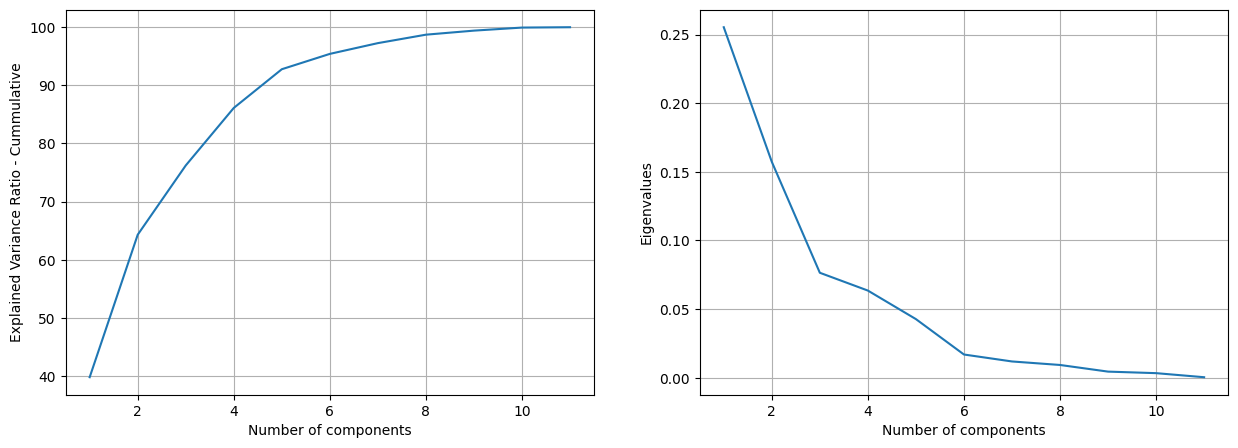

In [20]:
#displays the number of components for us to determine the total number
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 12), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 12), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [21]:
#use cumsum to determine the number of components / features that will be used later
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

6

In [22]:
#After determining the number of components to be used, PCA will be carried out to shorten the number of columns
pca = PCA(n_components=6)
pca.fit(df2_scaled)

df2_scaled_pca = pca.transform(df2_scaled)
df2_scaled_pca

array([[-3.36940452e-01, -5.09494695e-01,  1.09665571e-02,
         3.14627810e-02, -7.65130719e-02,  4.30170031e-02],
       [ 2.48849052e-01, -1.54351396e-01,  2.30440165e-01,
         7.61595409e-01,  1.33941163e-01, -1.01935210e-01],
       [-3.63360628e-01, -3.88041722e-01,  1.16853957e-01,
        -1.22543502e-01,  2.18624627e-01,  6.14610235e-02],
       [-2.77306757e-01, -1.47672469e-01,  1.80344655e-01,
        -5.32887116e-02,  5.74088865e-02,  9.23079178e-02],
       [ 2.58518755e-03, -4.86355243e-01, -5.98355784e-02,
        -4.04545665e-03,  1.51516113e-01,  8.89951598e-04],
       [ 1.44430137e-01,  4.55854548e-01, -6.08019164e-01,
        -2.30658038e-01,  2.64105436e-02,  5.54866906e-02],
       [ 1.25111258e-01,  2.69431540e-01, -5.61835062e-01,
         1.04492900e-01, -2.03151339e-01, -7.98944292e-02],
       [-1.83909543e-01, -3.72073844e-01, -1.08666767e-01,
         1.20275324e-01, -1.51613733e-01,  2.23842142e-02],
       [ 8.63194987e-01,  1.38116472e-01,  3.654

# v. Model Evaluation

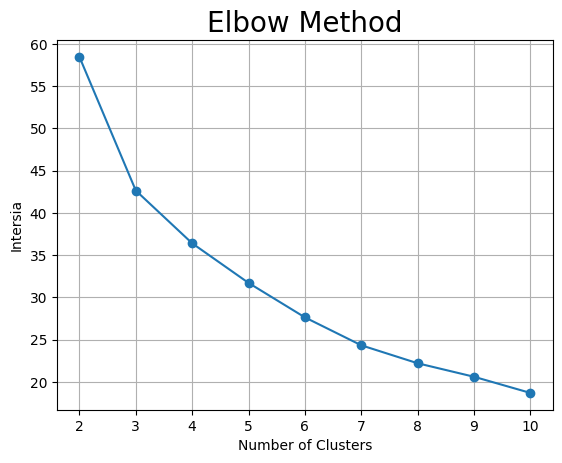

In [23]:
wcss = []
random_state = 777
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df2_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Intersia')
plt.show()

Results: I took 3 clusters as a temporary reference because I saw that the biggest change in elbows was in cluster 3 even though the interstitial value was high

In [24]:
#define the silhouette function from k-means
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # create subplot
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        #initialize cluster
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        #create a variable for the average of the silhouette
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        #Compute silhouette for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

     
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([]) 
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

     
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        #labelling cluster
        centers = clusterer.cluster_centers_

        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3403624061891531
For n_clusters = 3 The average silhouette_score is : 0.32153338799956177
For n_clusters = 4 The average silhouette_score is : 0.3296888281340397
For n_clusters = 5 The average silhouette_score is : 0.34228010220804805
For n_clusters = 6 The average silhouette_score is : 0.2770256818577554
For n_clusters = 7 The average silhouette_score is : 0.2859181925947805
For n_clusters = 8 The average silhouette_score is : 0.3084057080284747
For n_clusters = 9 The average silhouette_score is : 0.293162495740143


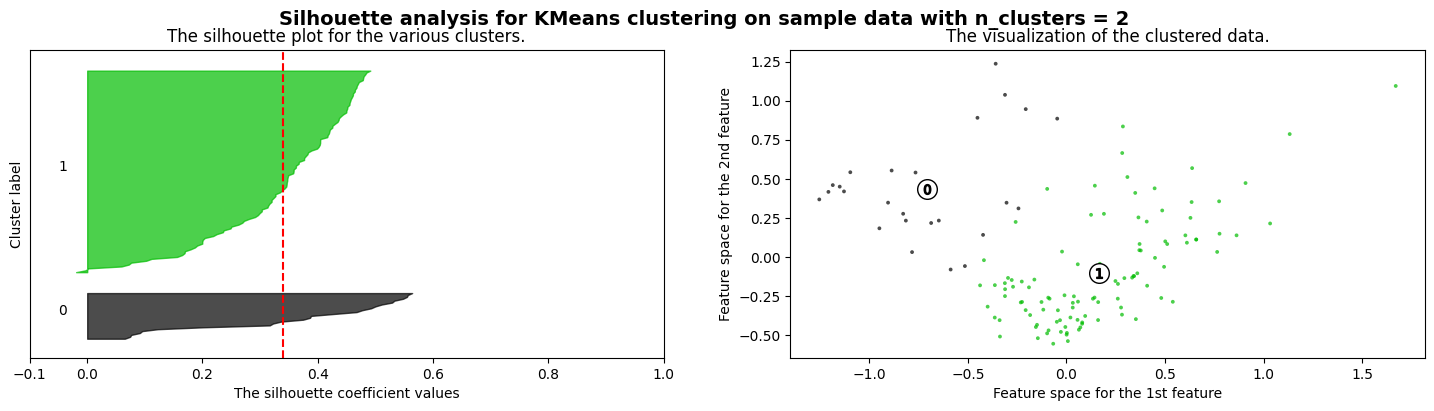

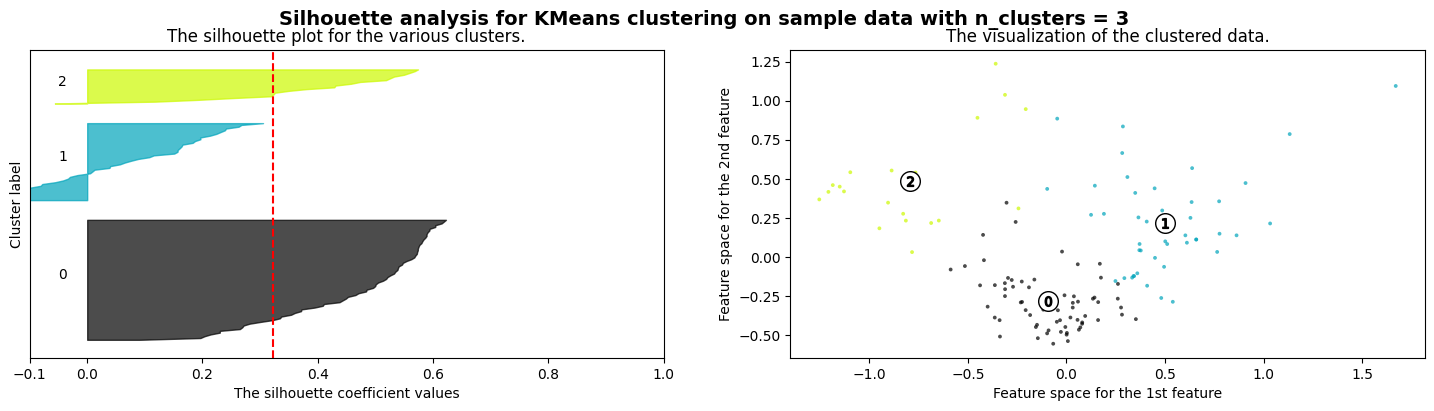

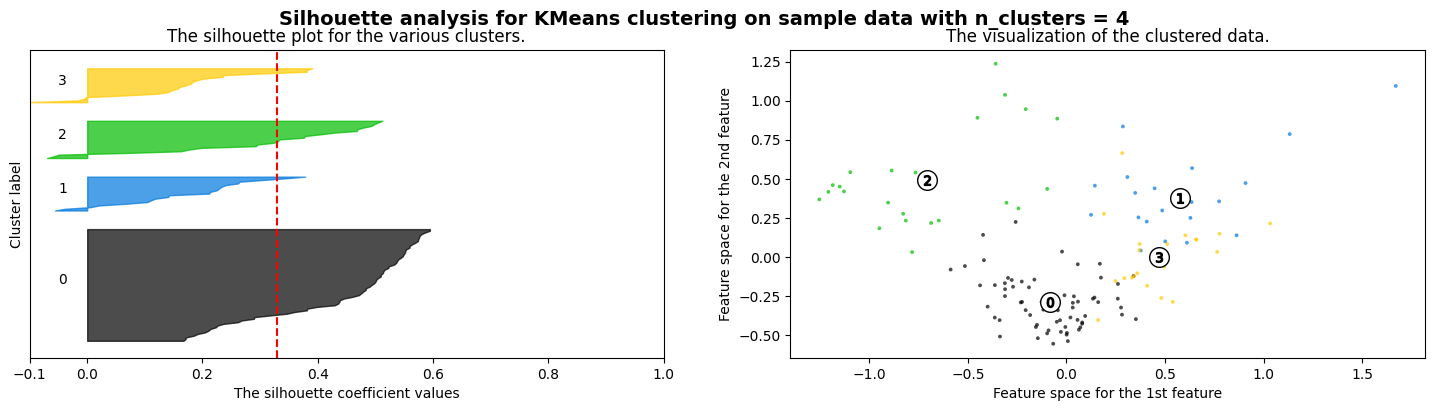

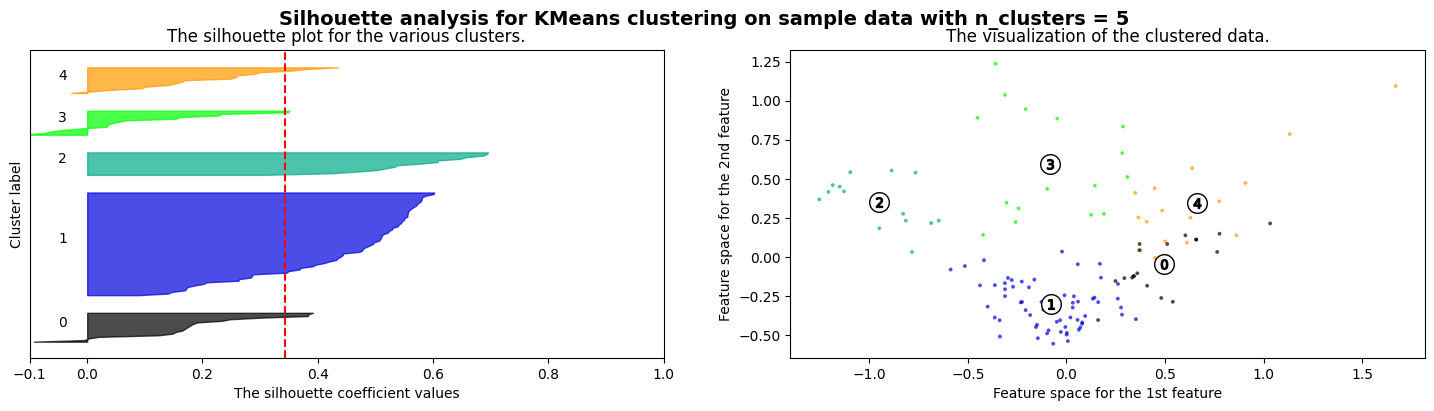

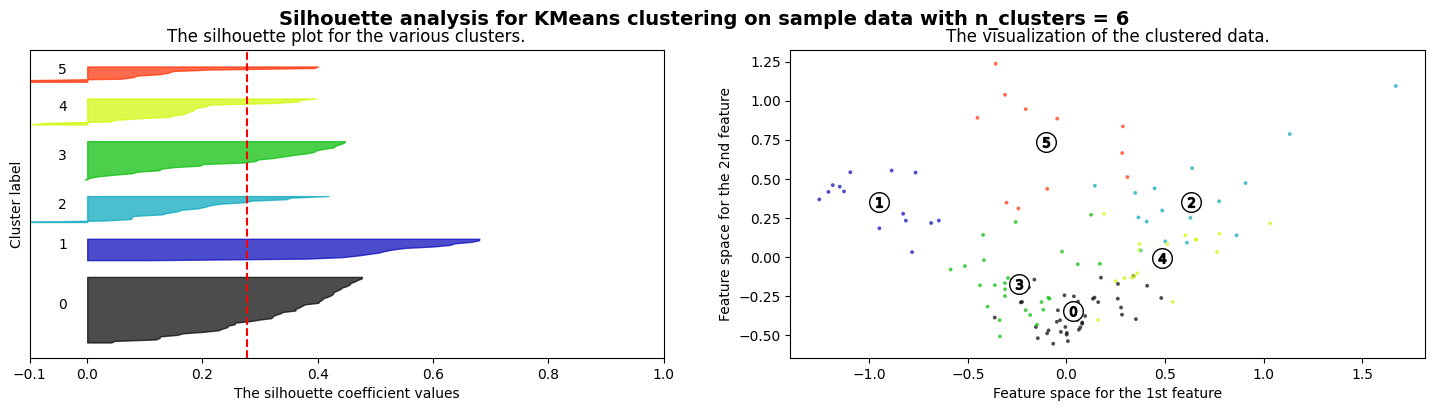

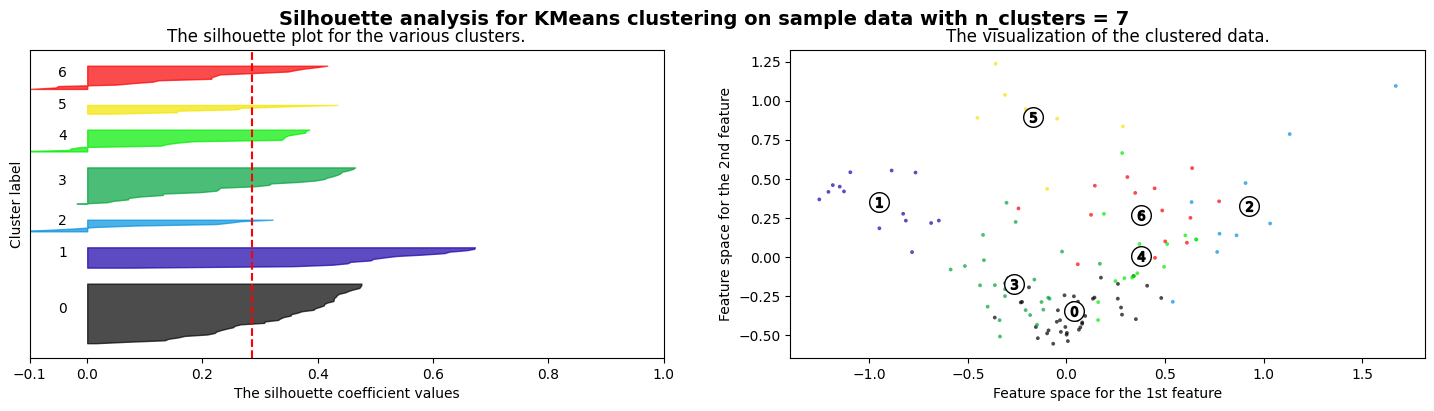

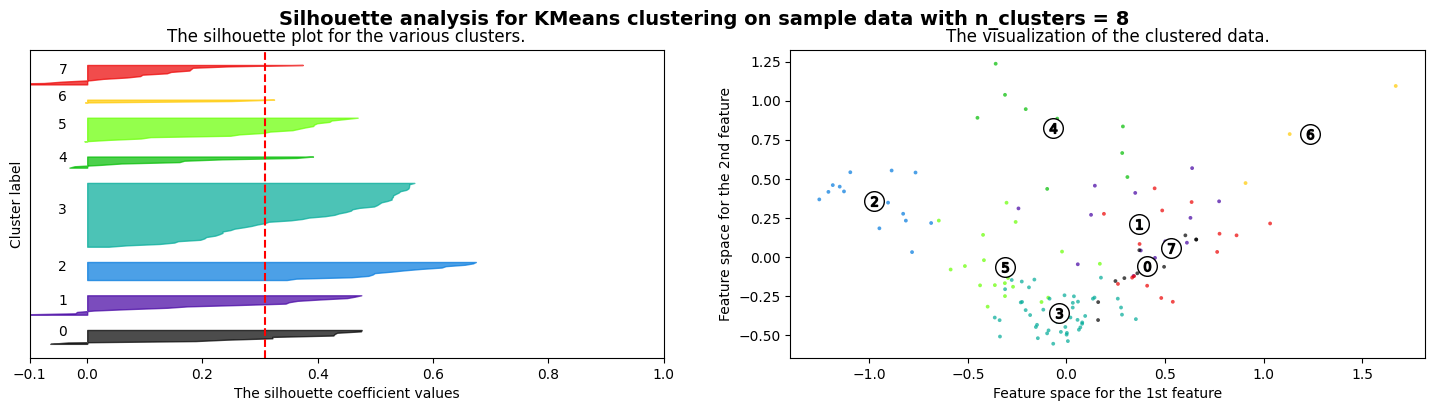

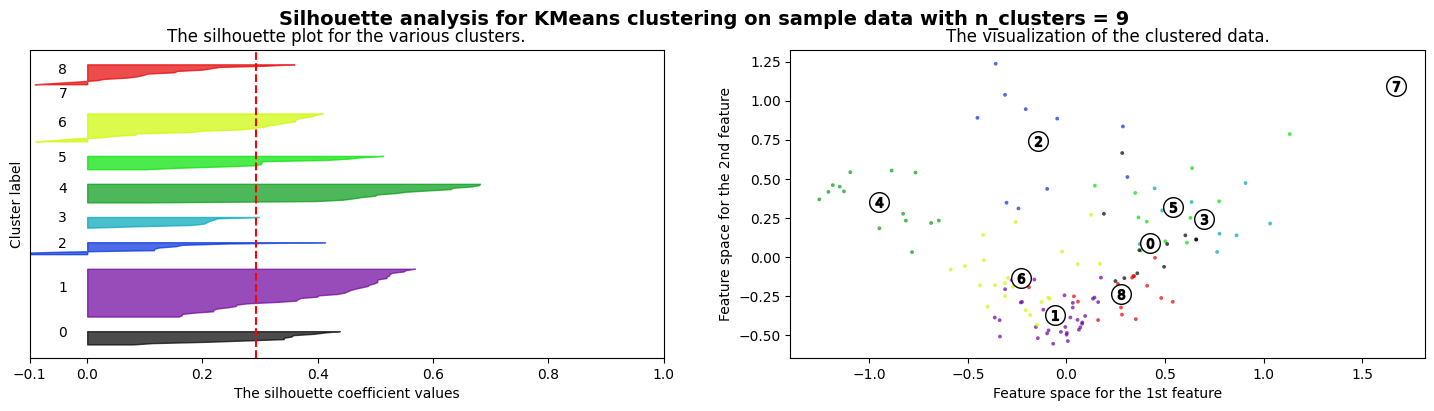

In [25]:
#display silhouette analysis using the K-means method
plot_silhouette(range(2, max_cluster), df2_scaled_pca, random_state)

Results: I took cluster 4 because it had the smallest miss clustering compared to the other clusters even though it had imbalanced data, but I saw that all clusters had imbalanced data. And also cluster 4 is close to cluster 3 in the elbow method so I took cluster 4

# vi. Model Training & Model Definition

In [26]:
#define k mean as a method for predicting clustering
km = KMeans(n_clusters =4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df2_scaled_pca)
pred

array([0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 2, 3, 0, 1, 0, 1, 0, 0, 3, 2, 3, 0,
       0, 1, 0, 2, 0, 0, 0, 3, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2,
       0, 3, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 3,
       3, 3, 0, 0, 1, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 3, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 3, 1, 0, 3, 0, 2, 3,
       2, 0, 0, 1, 1, 3, 3, 0, 2, 3, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 3, 0])

In [27]:
df1['clustering'] = pred
df1

C:\Users\kenne\AppData\Local\Temp\ipykernel_15640\1450502356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clustering'] = pred


,Unnamed: 0,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population,clustering
0,0,Afghanistan,AF,ASIA (EX. NEAR EAST),20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,4068194.0,37171921.0,0
1,1,Albania,AL,EASTERN EUROPE,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,2105339.0,2882740.0,3
2,2,Algeria,DZ,NORTHERN AFRICA,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,26350000.0,42228408.0,0
3,3,Argentina,AR,SOUTH AMERICA,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,33561876.0,44361150.0,0
4,4,Armenia,AM,CIS (FORMER USSR),33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,2043110.0,2951745.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Uruguay,UY,SOUTH AMERICA,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,2360269.0,3449285.0,0
133,133,Uzbekistan,UZ,CIS (FORMER USSR),27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,16692456.0,32476244.0,0
134,134,Vietnam,VN,ASIA (EX. NEAR EAST),37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,68172134.0,95545962.0,2
135,135,Yemen,YE,NEAR EAST,53.14,6.71,67.12,24.74,14.41,17.0,15.98,0.40,39.94,7548512.0,28498683.0,3


In [28]:
#create new variable
df3=df1
df3

,Unnamed: 0,Country,Country code,Continental Region,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population,clustering
0,0,Afghanistan,AF,ASIA (EX. NEAR EAST),20.37,2.72,14.92,12.41,23.04,35.0,1.02,0.38,2.12,4068194.0,37171921.0,0
1,1,Albania,AL,EASTERN EUROPE,35.50,8.47,29.32,25.82,30.19,32.0,2.80,0.72,96.39,2105339.0,2882740.0,3
2,2,Algeria,DZ,NORTHERN AFRICA,26.87,4.59,28.82,14.48,24.63,20.0,0.51,0.16,2.24,26350000.0,42228408.0,0
3,3,Argentina,AR,SOUTH AMERICA,34.69,7.71,28.17,33.32,30.72,28.0,2.38,0.44,11.47,33561876.0,44361150.0,0
4,4,Armenia,AM,CIS (FORMER USSR),33.89,11.61,27.59,30.55,28.86,21.0,0.76,0.22,13.02,2043110.0,2951745.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Uruguay,UY,SOUTH AMERICA,52.07,13.93,44.01,49.39,30.07,35.0,1.51,0.10,6.33,2360269.0,3449285.0,0
133,133,Uzbekistan,UZ,CIS (FORMER USSR),27.31,9.29,26.83,24.22,22.37,60.0,0.60,0.01,23.75,16692456.0,32476244.0,0
134,134,Vietnam,VN,ASIA (EX. NEAR EAST),37.48,13.22,38.70,19.98,29.38,46.0,0.49,0.07,5.55,68172134.0,95545962.0,2
135,135,Yemen,YE,NEAR EAST,53.14,6.71,67.12,24.74,14.41,17.0,15.98,0.40,39.94,7548512.0,28498683.0,3


c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: >

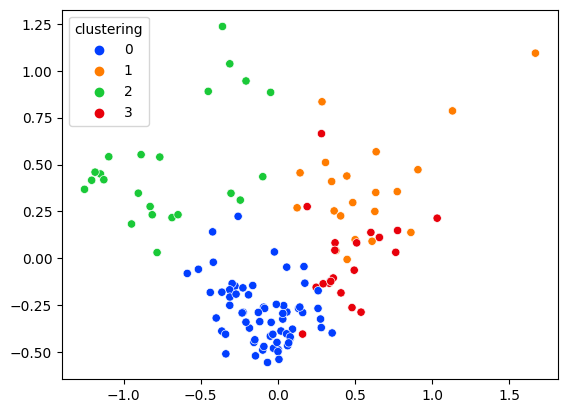

In [29]:
#visualize clustering in 2D
pca_2d = PCA(n_components=6)
pca_2d.fit(df2_scaled)

tenure_scaled_pca_2d = pca_2d.fit_transform(df2_scaled)

sns.scatterplot(x=tenure_scaled_pca_2d[:,0], y=tenure_scaled_pca_2d[:,1], hue=df3['clustering'], palette='bright')

Results: From the visualization we can see that there are still clusters that overlap with each other, especially cluster 3

# vii. Exploratory Data Analysis (EDA)

In [30]:
#check clustering to assess whether the data is imbalanced or not
df3['clustering'].value_counts()

clustering
0    67
2    23
3    21
1    21
Name: count, dtype: int64

In [31]:
#menampilakn list kolom yang ada pada dataset yang sudah dimasukkan kolom clustering
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 136
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          132 non-null    int64  
 1   Country                             132 non-null    object 
 2   Country code                        132 non-null    object 
 3   Continental Region                  132 non-null    object 
 4   Cost of Living Index                132 non-null    float64
 5   Rent Index                          132 non-null    float64
 6   Groceries Index                     132 non-null    float64
 7   Restaurant Price Index              132 non-null    float64
 8   Local Purchasing Power Index        132 non-null    float64
 9   Number of Internet Plans            132 non-null    float64
 10  Average Price per 1GB (USD)         132 non-null    float64
 11  Cheapest Price per 1GB (USD)        132 non-null  

In [32]:
#create a new variable to store the mentioned columns
selected_columns = [
    'Unnamed: 0',
    'Cost of Living Index',
    'Rent Index',
    'Groceries Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Number of Internet Plans',
    'Average Price per 1GB (USD)',
    'Cheapest Price per 1GB (USD)',
    'Most Expensive Price per 1GB (USD)',
    'Internet Users',
    'clustering'
]

#Create a new DataFrame containing only the selected columns
df4 = df3[selected_columns].copy()


In [33]:
# Group by 'clustering' column and calculate the mean of each numeric column
clust_kmeans = df4.groupby('clustering').mean()
clust_kmeans

,Unnamed: 0,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users
clustering,,,,,,,,,,,
0,66.104478,38.945672,12.092836,35.537463,31.232239,34.246418,32.746269,1.400597,0.426269,10.828955,9.277058e+06
1,60.904762,82.919524,42.601429,77.607143,83.056190,85.664762,31.761905,3.990952,0.970952,28.434762,7.027135e+06
2,77.434783,44.407391,16.869565,41.707826,36.320000,49.200000,48.608696,1.342174,0.308261,19.470870,1.719752e+08
3,69.857143,56.270476,17.965714,54.244286,45.724762,39.864286,21.095238,5.573810,1.248571,92.401905,6.316433e+06


In [34]:
#scale each clustering so that you can check the correlation of each column with the clustering
scaler = MinMaxScaler()
data = scaler.fit_transform(clust_kmeans)
scaled_means = pd.DataFrame(data,clust_kmeans.index,clust_kmeans.columns)

<Axes: ylabel='clustering'>

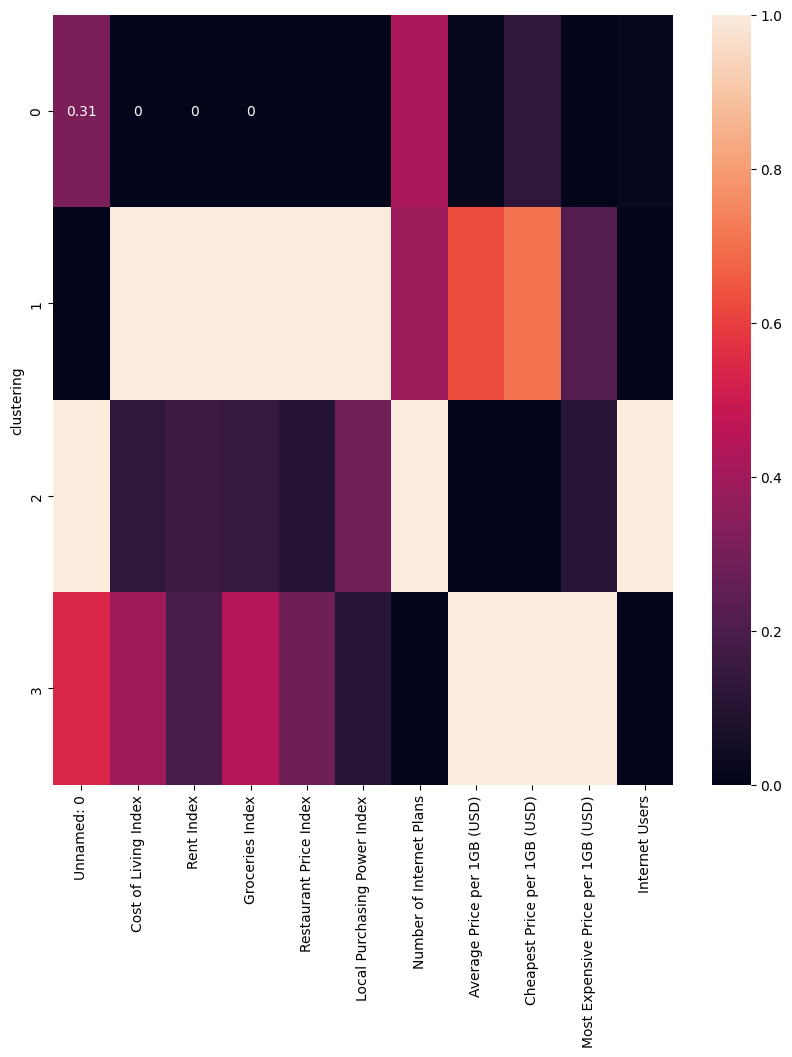

In [35]:
#search for correlation between columns using clustering
plt.figure(figsize=(10, 10))

sns.heatmap(scaled_means,annot=True)

Results :

cluster 0: has the lowest value of all clusters

Cluster 1: has high cost of living index, rent index, groceries index, restaurant price index values

cluster 2: has a high number of internet plans, internet users, population

cluster 3: has the average price per 1GB, cheapest price per 1GB, most expensive price per 1GB

In [36]:
#create a new variable to change the column in list form
clust_col = df3.columns.tolist()

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

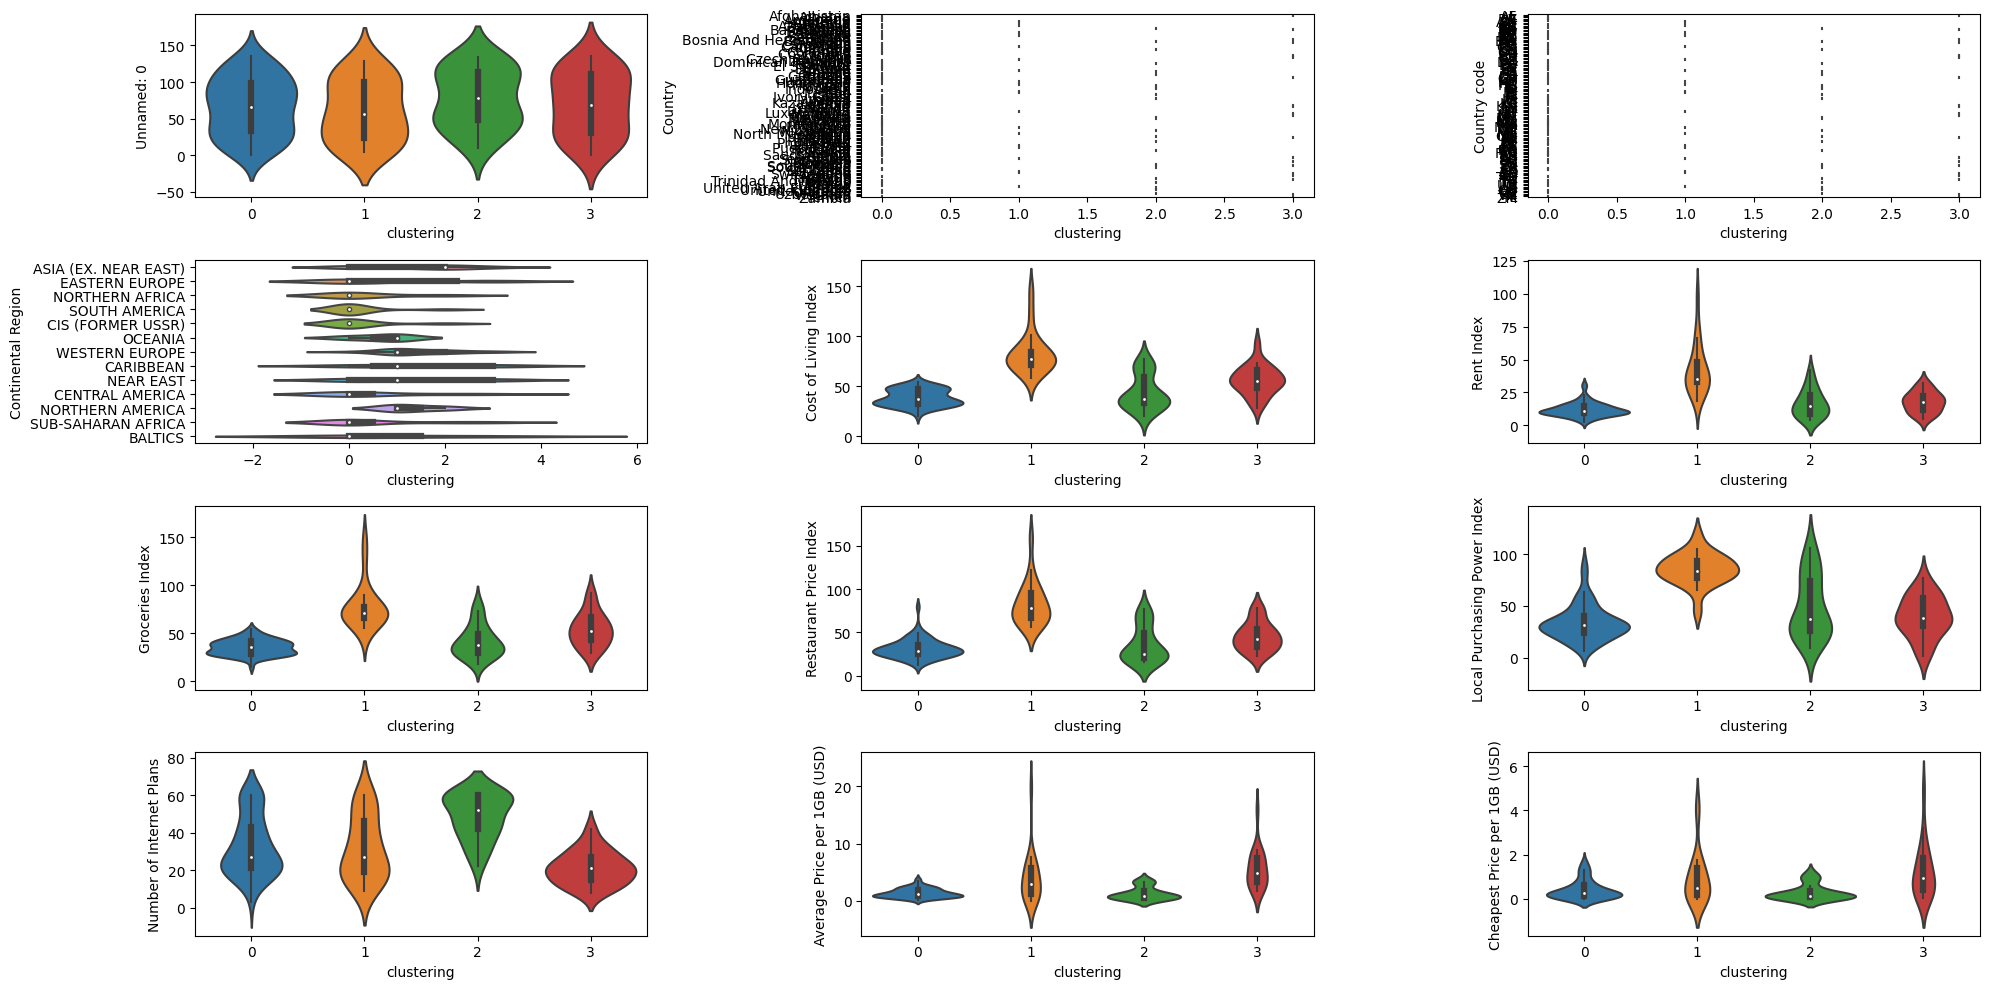

In [37]:
#make a violin plot to see the characteristics of each cluster in each column
fig, axes = plt.subplots(4, 3, figsize=(20,10))

axes = axes.flatten()

for ax, col in zip(axes, clust_col):
    _ = sns.violinplot(x=df3["clustering"], y=df3[col], ax=ax)
    plt.tight_layout()

Results :

It can be seen that the majority of each cluster has different characteristics in each column so we can say that this clustering is good

In [38]:
df3.columns

Index(['Unnamed: 0', 'Country', 'Country code', 'Continental Region',
       'Cost of Living Index', 'Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Number of Internet Plans', 'Average Price per 1GB (USD)',
       'Cheapest Price per 1GB (USD)', 'Most Expensive Price per 1GB (USD)',
       'Internet Users', 'Population', 'clustering'],
      dtype='object')

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Cost of Living Index', ylabel='Rent Index'>

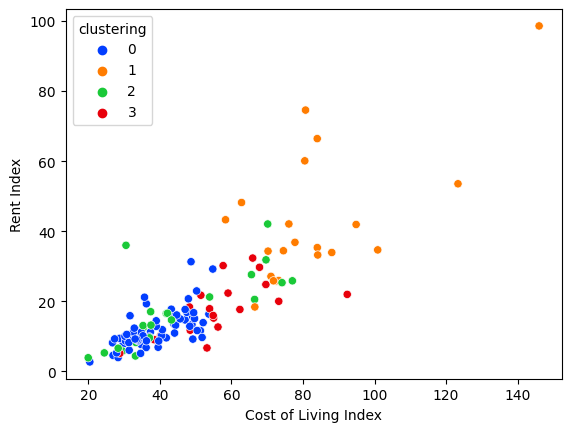

In [39]:
#displays a scatterplot of clustering based on the cost of living index and rent index
sns.scatterplot(data=df3, x="Cost of Living Index", y="Rent Index", hue="clustering",palette="bright")

Results :

It can be seen that cluster 1 countries have the highest scores for the cost of living and high rental costs compared to cluster 0 which has the lowest costs of living and rental costs.

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Groceries Index', ylabel='Restaurant Price Index'>

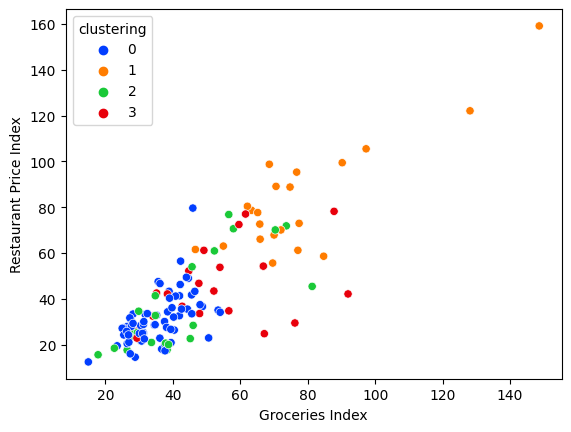

In [40]:
#displays a scatterplot of clustering based on the groceries index and restaurant price index
sns.scatterplot(data=df3, x='Groceries Index', y="Restaurant Price Index", hue="clustering",palette="bright")

Results :

Again, we can see that countries in cluster 1 have high restaurant prices and daily necessities costs compared to countries in cluster 0 which have low restaurant prices and daily necessities costs.

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Number of Internet Plans', ylabel='Internet Users'>

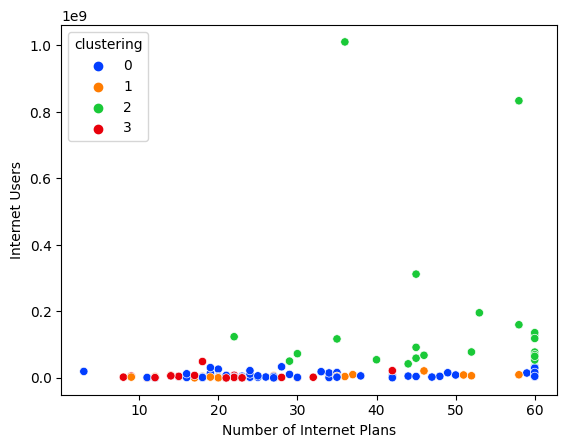

In [41]:
#displays a scatterplot of clustering based on Number of Internet Plans and Internet Users
sns.scatterplot(data=df3, x='Number of Internet Plans', y="Internet Users", hue="clustering",palette="bright")

Results :

Countries in cluster 2 have the highest internet users compared to countries in other clusters

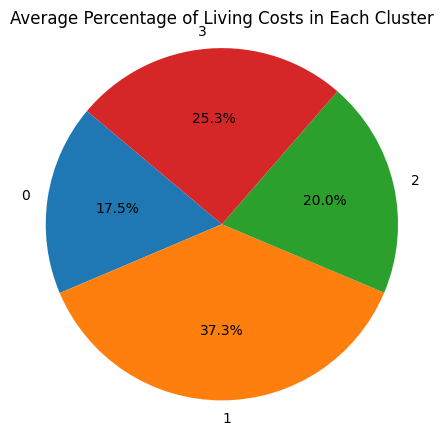

In [42]:
#displays a pie chart based on clustering and cost of living index
average_cost = df3.groupby('clustering')['Cost of Living Index'].mean()

# create a variable for the average cost of living
labels = average_cost.index
sizes = average_cost.values


plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Average Percentage of Living Costs in Each Cluster')
plt.axis('equal') 


plt.show()

Hasil :

It can be seen that countries in cluster 1 have the highest cost of living and cluster 0 has the lowest cost of living

In [43]:
#divide each list of countries into each cluster to later recommend countries based on cluster type
df_cluster0=df3[(df3['clustering']==0) & (df3['Country'])]
df_cluster1=df3[(df3['clustering']==1) & (df3['Country'])]
df_cluster2=df3[(df3['clustering']==2) & (df3['Country'])]
df_cluster3=df3[(df3['clustering']==3) & (df3['Country'])]

In [44]:
#see the list of countries in cluster 0
df_cluster0['Country'].value_counts()

Country
Afghanistan    1
Portugal       1
Malaysia       1
Mauritius      1
Moldova        1
              ..
Ivory Coast    1
Jamaica        1
Jordan         1
Kazakhstan     1
Zambia         1
Name: count, Length: 67, dtype: int64

In [45]:
#see the list of countries in cluster 1
df_cluster1['Country'].value_counts()

Country
Australia               1
Israel                  1
Switzerland             1
Sweden                  1
Singapore               1
Qatar                   1
Puerto Rico             1
Norway                  1
New Zealand             1
Luxembourg              1
Ireland                 1
Austria                 1
Iceland                 1
Hong Kong               1
Finland                 1
Denmark                 1
Canada                  1
Bermuda                 1
Belgium                 1
Bahamas                 1
United Arab Emirates    1
Name: count, dtype: int64

In [46]:
#see the list of countries in cluster 2
df_cluster2['Country'].value_counts()

Country
Bangladesh        1
Nigeria           1
United States     1
United Kingdom    1
Turkey            1
Thailand          1
Spain             1
South Africa      1
Russia            1
Philippines       1
Pakistan          1
Mexico            1
Brazil            1
Japan             1
Italy             1
Iran              1
Indonesia         1
India             1
Germany           1
France            1
Egypt             1
China             1
Vietnam           1
Name: count, dtype: int64

In [47]:
#see the list of countries in cluster 3
df_cluster3['Country'].value_counts()

Country
Lebanon                2
Albania                1
Malta                  1
Trinidad And Tobago    1
Taiwan                 1
Syria                  1
South Korea            1
Slovenia               1
Seychelles             1
Panama                 1
Maldives               1
Barbados               1
Latvia                 1
Greece                 1
Czech Republic         1
Cyprus                 1
Cuba                   1
Bulgaria               1
Botswana               1
Yemen                  1
Name: count, dtype: int64

# viii. Model Saving

In [48]:
# save the model we use the pickle module

with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1) 

with open('model_kmeans.pkl', 'wb') as file_2:
  pickle.dump(km, file_2) 

with open('model_pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3) 

# ix. Model Inference

In [49]:
# load scaler and model
with open('model_scaler.pkl', 'rb') as file_1:
  model_scaler = pickle.load(file_1)

with open('model_kmeans.pkl', 'rb') as file_2:
  model_kmeans = pickle.load(file_2)

with open('model_pca.pkl', 'rb') as file_3:
  model_pca = pickle.load(file_3)

In [50]:
#define columns in df2
df2.columns

Index(['Cost of Living Index', 'Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Number of Internet Plans', 'Average Price per 1GB (USD)',
       'Cheapest Price per 1GB (USD)', 'Most Expensive Price per 1GB (USD)',
       'Internet Users', 'Population'],
      dtype='object')

In [51]:
#create dummy data for data inferences
np.random.seed(777)
Cost_of_Living_Index = np.random.uniform(19.92,146.04,50)
Rent_Index = np.random.uniform(2.72,98.58,50)
Groceries_Index = np.random.uniform(14.92,148.66,50)
Restaurant_Price_Index = np.random.uniform(12.41,159.17,50)
Local_Purchasing_Power_Index = np.random.uniform(1.45,118.44,50)
Number_of_Internet_Plans = np.random.uniform(3.00,60.00,50)
Average_Price_per_1GB = np.random.uniform(0.05,19.80,50)
Cheapest_Price_per_1GB = np.random.uniform(0.00,4.94,50)
Most_Expensive_Price_per_1GB = np.random.uniform(0.85,768.87,50)
Internet_Users = np.random.uniform(55677,1010740000,50)
Population = np.random.uniform(62756,1427647786,50)


In [52]:
# make data inferences
data_inf = pd.DataFrame({
    'Cost of Living Index' : Cost_of_Living_Index,
    'Rent Index' : Rent_Index,
    'Groceries Index': Groceries_Index,
    'Restaurant Price Index' : Restaurant_Price_Index,
    'Local Purchasing Power Index' : Local_Purchasing_Power_Index,
    'Number of Internet Plans' : Number_of_Internet_Plans,
    'Average Price per 1GB (USD)' : Average_Price_per_1GB,
    'Cheapest Price per 1GB (USD)' : Cheapest_Price_per_1GB,
    'Most Expensive Price per 1GB (USD)' : Most_Expensive_Price_per_1GB,
    'Internet Users' : Internet_Users,
    'Population' : Population,
    
})

data_inf.head()

,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population
0,39.173950,13.767834,137.963138,151.137277,91.830456,21.983070,18.943601,1.180396,29.033473,5.298402e+08,4.716603e+08
1,58.053216,68.029792,112.310450,54.361130,64.014148,41.058087,4.104983,2.474173,582.076568,6.861671e+08,1.063765e+09
2,27.744033,37.453300,47.800852,108.234113,19.809220,24.234576,12.175590,0.951595,249.934532,9.503176e+08,1.413734e+09
3,77.917586,35.715865,17.533275,131.438309,56.811465,54.362130,0.238227,2.985029,11.853665,8.338056e+08,1.409994e+09
4,125.262157,45.810867,109.338944,71.910394,83.809418,29.696684,1.402420,1.776429,728.536320,3.443782e+08,9.725182e+08


In [53]:
#do scaling 
scaled_inf = model_scaler.fit_transform(data_inf)
scaled_inf

array([[1.42843919e-01, 1.08712326e-01, 1.00000000e+00, 9.72418545e-01,
        8.58890632e-01, 3.34784337e-01, 9.78046829e-01, 2.38220774e-01,
        2.35525501e-02, 5.09641810e-01, 3.27055050e-01],
       [2.96285982e-01, 6.79233101e-01, 7.87615121e-01, 2.91068396e-01,
        5.87043294e-01, 6.77609352e-01, 2.02180854e-01, 5.11641876e-01,
        7.81743485e-01, 6.71615288e-01, 7.50009043e-01],
       [4.99467592e-02, 3.57745920e-01, 2.53524361e-01, 6.70359848e-01,
        1.55030832e-01, 3.75249445e-01, 6.24168215e-01, 1.89866827e-01,
        3.26395460e-01, 9.45307079e-01, 1.00000000e+00],
       [4.57734532e-01, 3.39478186e-01, 2.93168008e-03, 8.33728432e-01,
        5.16651853e-01, 9.16715750e-01, 0.00000000e+00, 6.19604046e-01,
        0.00000000e+00, 8.24586609e-01, 9.97328308e-01],
       [8.42529620e-01, 4.45619009e-01, 7.63013291e-01, 4.14623575e-01,
        7.80501441e-01, 4.73416963e-01, 6.08720664e-02, 3.64183833e-01,
        9.82531556e-01, 3.17480792e-01, 6.84829195e-

In [54]:
#perform pca on data that has been scaled
pca_inf = model_pca.fit_transform(scaled_inf)
pca_inf

array([[ 0.66517448,  0.24354878,  0.16361727,  0.34345604,  0.31488104,
        -0.75138126],
       [-0.58020084,  0.30941766,  0.04401557,  0.07326939, -0.24539147,
        -0.04230517],
       [ 0.0163886 ,  0.02039146,  0.89937964,  0.11586899, -0.10364869,
         0.04701576],
       [-0.21061449, -0.52443179,  0.77780654,  0.3236954 , -0.46781778,
        -0.06147743],
       [-0.529356  ,  0.37041882, -0.2267166 , -0.01352126,  0.0214424 ,
        -0.10069083],
       [ 0.2602411 ,  0.29610236,  0.0467575 ,  0.10160712,  0.72465767,
         0.1730343 ],
       [ 0.12199707, -0.26628136, -0.51834994, -0.31703467,  0.51585907,
         0.3361015 ],
       [-0.25485931, -0.05780776, -0.78236525, -0.00496642, -0.0662899 ,
         0.0811435 ],
       [ 0.29629614, -0.325761  ,  0.4215785 , -0.6453307 ,  0.11728608,
         0.06589591],
       [-0.15868167,  0.22739863,  0.0313724 , -0.08306076, -0.01555761,
        -0.23951801],
       [-0.0050612 , -0.46967515,  0.22264778,  0.

In [55]:
#using the kmeans model to determine clustering
cluster_inf = model_kmeans.predict(pca_inf)
cluster_inf

array([3, 2, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 2, 0, 3, 1, 1, 1, 1, 2, 3,
       1, 2, 3, 0, 1, 2, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 1, 2, 0, 0, 1,
       0, 0, 1, 2, 0, 0])

In [56]:
#convert into data frame form
cluster_inf_new = pd.DataFrame(cluster_inf, columns=['Clustering - Prediction'])
cluster_inf_new

,Clustering - Prediction
0,3
1,2
2,3
3,0
4,2
5,3
6,0
7,0
8,0
9,0


In [57]:
#displays data that has been combined with raw data and data that has been clustered
tabel_inf = pd.concat([data_inf, cluster_inf_new], axis=1)
tabel_inf

,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Number of Internet Plans,Average Price per 1GB (USD),Cheapest Price per 1GB (USD),Most Expensive Price per 1GB (USD),Internet Users,Population,Clustering - Prediction
0,39.173950,13.767834,137.963138,151.137277,91.830456,21.983070,18.943601,1.180396,29.033473,5.298402e+08,4.716603e+08,3
1,58.053216,68.029792,112.310450,54.361130,64.014148,41.058087,4.104983,2.474173,582.076568,6.861671e+08,1.063765e+09,2
2,27.744033,37.453300,47.800852,108.234113,19.809220,24.234576,12.175590,0.951595,249.934532,9.503176e+08,1.413734e+09,3
3,77.917586,35.715865,17.533275,131.438309,56.811465,54.362130,0.238227,2.985029,11.853665,8.338056e+08,1.409994e+09,0
4,125.262157,45.810867,109.338944,71.910394,83.809418,29.696684,1.402420,1.776429,728.536320,3.443782e+08,9.725182e+08,2
5,136.832868,5.302685,118.499339,87.793084,42.580955,9.143128,19.363461,1.822172,399.073155,8.097614e+08,6.925512e+08,3
6,111.607851,42.525644,78.175623,32.978275,10.035265,20.809872,19.279743,3.108142,525.475484,7.166187e+07,2.148504e+08,0
7,116.842744,91.125131,122.108245,35.483529,58.500715,28.808512,6.562441,3.885839,426.199142,1.768618e+08,2.448836e+08,0
8,53.872143,11.462966,38.377718,17.607406,25.301974,17.086534,17.240383,2.400392,44.216593,4.336789e+08,1.134486e+09,0
9,101.144974,32.927574,111.235448,84.587450,93.181897,6.955084,3.495369,3.418090,398.295981,5.337387e+08,1.039233e+09,0


# xi. Conclusion

### Characteristics of Each Cluster:

cluster 0: the country has the lowest figures in terms of everything, including cost of living, housing costs, internet prices

Cluster 1: the country that has the highest cost of living where we have to pay large costs for housing, large costs for necessities and high restaurant prices. This country is a developed country

cluster 2: countries that have various choices of internet packages because the population in these countries is large and almost all residents use the internet in their daily activities

cluster 3: a country that has a wide variety of prices because its population has varying income levels and the cost of living is the second highest compared to cluster 1, so varying prices are an option in that country

### Recommended Countries to Visit

Cluster 0:
- If you want to go abroad but with a small budget / budget friendly you can go to this country because it has low costs of living such as relatively cheap housing, food and daily necessities: Afghanistan, Algeria, Argentina, Armenia ,Azerbaijan,Bahrain,Belarus,Belize,Bolivia,Bosnia And Herzegovina,Cambodia,Cameroon,Chile,Colombia,Costa Rica,Croatia,Dominican Republic,Ecuador,El Salvador,Estonia,Ethiopia,Fiji,Georgia,Ghana,Guatemala,Honduras, Hungary,Iraq,Ivory Coast,Jamaica,Jordan,Kazakhstan,Kenya,Kuwait,Libya,Lithuania,Malaysia,Mauritius,Moldova,Mongolia,Montenegro,Morocco,Myanmar,Nepal,Nicaragua,North Macedonia,Oman,Paraguay,Peru,Poland, Portugal,Romania,Rwanda,Saudi Arabia,Senegal,Serbia,Slovakia,Somalia,Sri Lanka,Suriname,Tanzania,Tunisia,Uganda,Ukraine,Uruguay,Uzbekistan,Zambia

Cluster 1:
- If you want to go to a developed country like cluster 1 with a metropolis atmosphere, you can go to the countries: Australia, Israel, Switzerland, Sweden, Singapore, Qatar, Puerto Rico, Norway, New Zealand, Luxembourg, Ireland, Austria, Iceland, Hong Kong,Finland,Denmark,Canada,Bermuda,Belgium,Bahamas,United Arab Emirates

Cluster 2:
- If you want to go to a country that has many choices of internet packages and has a large population where you can interact with local residents, this country might be suitable for those of you who are vloggers because you can interact with local residents as video material, you can go to countries: Bangladesh, Nigeria, United States, United Kingdom, Turkey, Thailand, Spain, South Africa, Russia, Philippines, Pakistan, Mexico, Brazil, Japan, Italy, Iran, Indonesia, India, Germany, France, Egypt, China, Vietnamese

Cluster 3:
- If you want to go to a country with various internet price options to cut your budget because the costs are quite high, you can go to the countries: Lebanon, Albania, Malta, Trinidad and Tobago, Taiwan, Syria, South Korea, Slovenia, Seychelles, Panama, Maldives ,Barbados,Latvia,Greece,Czech Republic,Cyprus,Cuba,Bulgaria,Botswana,Yemen

## Final Conclusion of State Recommendations:

For my beloved friends, you can settle in one of these countries because they have low costs of living (residence, food, internet, etc.) compared to other countries.

List of countries:

Afghanistan,Algeria,Argentina,Armenia,Azerbaijan,Bahrain,Belarus,Belize,Bolivia,Bosnia And Herzegovina,Cambodia,Cameroon,Chile,Colombia,Costa Rica,Croatia,Dominican Republic,Ecuador,El Salvador,Estonia,Ethiopia,Fiji,Georgia ,Ghana,Guatemala,Honduras,Hungary,Iraq,Ivory Coast,Jamaica,Jordan,Kazakhstan,Kenya,Kuwait,Libya,Lithuania,Malaysia,Mauritius,Moldova,Mongolia,Montenegro,Morocco,Myanmar,Nepal,Nicaragua,North Macedonia,Oman ,Paraguay,Peru,Poland,Portugal,Romania,Rwanda,Saudi Arabia,Senegal,Serbia,Slovakia,Somalia,Sri Lanka,Suriname,Tanzania,Tunisia,Uganda,Ukraine,Uruguay,Uzbekistan,Zambia